#TP04 - Histogram equalisation

Importing libraries and declaring methods

In [ ]:
import PIL
from PIL import Image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math


def rgb2yiq(img):
    #img as np array of (dim, dim, ..., channels)
    mat=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    matyiq = np.dot(img, mat.T)
    return np.clip(matyiq, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))

def yiq2rgb(img):
    #img as np array of (dim, dim, ..., channels)
    mat = np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    return np.dot(img, mat.T)

def Yalpha(img, alpha):
    #img as np array of (dim, dim, ..., channels)
    alphaed = np.copy(img)
    alphaed[:,:,0]*=alpha
    return alphaed

def normalise(img):
    #img as np array
    return img/255.0

def denormalise(img):
    #img as np array
    return img*255.0

def linear(img, max, min):
  #img as yiq
  result = img.copy()
  result[np.where((min > result[:,:,0]))] = 0
  result[np.where((max < result[:,:,0]))] = 1
  mask = np.where(((max > result[:,:,0]) & (min < result[:,:,0])))
  result[mask] = (result[mask]-min)/ (max-min)
  return result





Load the image we'll use to work with

In [ ]:
#Load image
astronaut = data.astronaut() #load sample image from skimage
npastronaut = np.array(astronaut) #to numpy
imgyiq = rgb2yiq(normalise(npastronaut))

Here you can visualise the luma information of the image in histogram form and also modify the image according to three histogram equalisation methods.

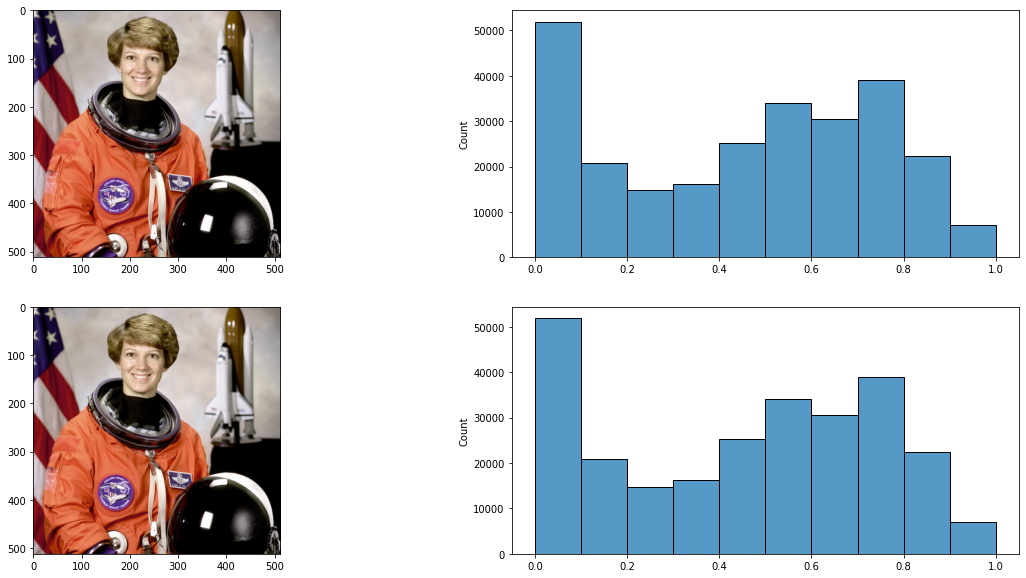

In [ ]:
#@title Interactive visualisation. { run: "auto" }
def plot(img, imgyiq, bins, fun, min, max):
  #img as yiq numpy
  plt.figure(figsize=(20,10))
  plt.title("Astronaut")
  plt.subplot(221)
  plt.imshow(img)
  plt.subplot(222)
  sns.histplot(imgyiq[:,:,0].flatten(), bins=bins)
  if type_op is "linear":
      if max<min:
        print("max must be higher than min")
      else:
        result=linear(imgyiq, max, min)
        plt.subplot(223)
        plt.imshow(np.uint8(denormalise(yiq2rgb(result))))
        plt.subplot(224)
        sns.histplot(result[:,:,0].flatten(), bins=bins)
  elif type_op is "sqrt":
    result=imgyiq.copy()
    result[:,:,0] = np.sqrt(result[:,:,0])
    plt.subplot(223)
    plt.imshow(np.uint8(denormalise(yiq2rgb(result))))
    plt.subplot(224)
    sns.histplot(result[:,:,0].flatten(), bins=bins)
  else:
    result=imgyiq.copy()
    result[:,:,0] = result[:,:,0]**2
    plt.subplot(223)
    plt.imshow(np.uint8(denormalise(yiq2rgb(result))))
    plt.subplot(224)
    sns.histplot(result[:,:,0].flatten(), bins=bins)
  plt.show()

bins = 10 #@param {type:"slider", min:10, max:50, step:10}
type_op = 'linear' #@param ["sqrt", "sqr", "linear"]
min = 0 #@param {type:"slider", min:0, max:1, step:0.1}
max = 1 #@param {type:"slider", min:0, max:1, step:0.1}
plot(npastronaut, imgyiq, bins, type_op, min, max)